# Table of Contents
* [1. Introduction](#1.-Introduction)
* [2. Quick exploration of the given data](#2.-Quick-exploration-of-the-given-data)
	* [2.1 Loading the data](#2.1-Loading-the-data)
	* [2.2 Data basic description](#2.2-Data-basic-description)
	* [2.3 Features classificacion](#2.3-Features-classificacion)
* [3. Features completion](#3.-Features-completion)
	* [3.1 Age](#3.1-Age)
	* [3.2 Cabin](#3.2-Cabin)
		* [3.2.1 Cabin from name?](#3.2.1-Cabin-from-name?)
	* [3.3 Embarked](#3.3-Embarked)
	* [3.4 Fare](#3.4-Fare)
* [4. Feature detailed analysis](#4.-Feature-detailed-analysis)
	* [4.1 Quantitative features](#4.1-Quantitative-features)
		* [4.1.1 Age](#4.1.1-Age)
		* [4.1.2 Fare](#4.1.2-Fare)
		* [4.1.3 SibSp (Sibblings + Spouses) and Parch (Parents + children)](#4.1.3-SibSp-%28Sibblings-+-Spouses%29-and-Parch-%28Parents-+-children%29)
	* [4.2 Categorical features](#4.2-Categorical-features)
		* [4.2.1 Sex](#4.2.1-Sex)
		* [4.2.2 Embarked](#4.2.2-Embarked)
		* [4.2.3 Pclass](#4.2.3-Pclass)
* [5. Feature engineering](#5.-Feature-engineering)


# 1. Introduction

In this notebook we'll try to create new features based on the data provided, which is called __feature engineering__. Moreover we will complete the missing data.



# 2. Quick exploration of the given data

Before starting we need to load the data and explore it to understand its meaning.

## 2.1 Loading the data

In [1]:
# import the usual suspects
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# let's load the data and have a first look at it
train_df = pd.read_csv('../input/train.csv', index_col='PassengerId')
test_df = pd.read_csv('../input/test.csv', index_col='PassengerId')
df = pd.concat([train_df, test_df])

df.sample(10)

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
1068,20.0,NaN,S,36.7500,"Sincock, Miss. Maude",0,2,female,0,NaN,C.A. 33112
373,19.0,NaN,S,8.0500,"Beavan, Mr. William Thomas",0,3,male,0,0.0,323951
800,30.0,NaN,S,24.1500,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",1,3,female,1,0.0,345773
213,22.0,NaN,S,7.2500,"Perkin, Mr. John Henry",0,3,male,0,0.0,A/5 21174
1235,58.0,B51 B53 B55,C,512.3292,"Cardeza, Mrs. James Warburton Martinez (Charlo...",1,1,female,0,NaN,PC 17755
29,NaN,NaN,Q,7.8792,"O'Dwyer, Miss. Ellen ""Nellie""",0,3,female,0,1.0,330959
952,17.0,NaN,S,7.8958,"Dika, Mr. Mirko",0,3,male,0,NaN,349232
74,26.0,NaN,C,14.4542,"Chronopoulos, Mr. Apostolos",0,3,male,1,0.0,2680
1026,43.0,NaN,S,7.8958,"Dintcheff, Mr. Valtcho",0,3,male,0,NaN,349226


## 2.2 Data basic description

Using pandas __.describe()__ method we can see general statistics for each feature.

In [3]:
# Have a look at other numerical features
df.describe()

,Age,Fare,Parch,Pclass,SibSp,Survived
count,1046.000000,1308.000000,1309.000000,1309.000000,1309.000000,891.000000
mean,29.881138,33.295479,0.385027,2.294882,0.498854,0.383838
std,14.413493,51.758668,0.865560,0.837836,1.041658,0.486592
min,0.170000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,21.000000,7.895800,0.000000,2.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,3.000000,0.000000,0.000000
75%,39.000000,31.275000,0.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,3.000000,8.000000,1.000000


Joining train and test sets there are 1309 people. There are 891 people in the train set (the ones with Survived data), but only 38% survived. The average age is 29.8 years. The fare has a wide range of prices, from free to 512. Around 38% travelled without parents nor children. The most common Pclass is 3rd. Almost half of the people travelled without sibblings nor spouse.

In [4]:
# Basic statistics for non-numerical cases
df.describe(include=['O'])

,Cabin,Embarked,Name,Sex,Ticket
count,295,1307,1309,1309,1309
unique,186,3,1307,2,929
top,C23 C25 C27,S,"Connolly, Miss. Kate",male,CA. 2343
freq,6,914,2,843,11


There is only information about 295 people with cabin. Most people embarked at "S", which is Southampton, UK. And there are more male than female.

## 2.3 Features classificacion

The data contains different features regarding each passenger:

* **Quantitative**, that is, numbers that are easy to work with
    * Continuous: Age, Fare
    * Discrete: SibSp, Parch


* **Categorical**, that represent categories, and will need some processing
    * Nominal: Embarked, Sex
    * Ordered: Pclass


* **Non classificable**, that will need some feature engineering to make them useful
    * Strings: Name, Cabin, Ticket

# 3. Features completion

Notice that some features have incomplete data: Age, Cabin and Embarked. There is also a missing value in Fare. Let's try to complete the data with reasonable values.

## 3.1 Age

We could estimate it guessing that young people don't mind travelling in 2nd or 3rd class

In [5]:
# Let's verify the guess using train+test data, grouping by Pclass
age_grouped_by_class = df[['Pclass','Age']].groupby('Pclass').median()
age_grouped_by_class

,Age
Pclass,
1,39.0
2,29.0
3,24.0


Given that the guess looks quite correct, let's complete the missing Age cases.

In [6]:
def complete_age(df):
    real_age = lambda row: row.Age if not pd.isnull(row.Age) else age_grouped_by_class.loc[row.Pclass].Age
    df['Age'] = df[['Age','Pclass']].apply(real_age, axis=1)
    
complete_age(df)

## 3.2 Cabin 

There are a lot of missing data in this feature. Let's first see if there are cabins in all classes or just in 1st class.

In [7]:
cabin_count_by_class = df[['Pclass','Cabin']].groupby('Pclass').count()
cabin_count_by_class

,Cabin
Pclass,
1,256
2,23
3,16


Let's explore the data a bit more, grouping cabins by its initial letter, which is its vessel's section or deck.

In [8]:
#Let's try to group by the first letter of the cabin (deck), and Pclass 
def add_cabin_letter(df):
    df['Cabin_letter'] = df['Cabin'].apply(lambda c: c[0] if not pd.isnull(c) else 'N') # N=none

add_cabin_letter(df)
df.sample(10)

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Cabin_letter
PassengerId,,,,,,,,,,,,
12,58.0,C103,S,26.5500,"Bonnell, Miss. Elizabeth",0,1,female,0,1.0,113783,C
748,30.0,NaN,S,13.0000,"Sinkkonen, Miss. Anna",0,2,female,0,1.0,250648,N
930,25.0,NaN,S,9.5000,"Sap, Mr. Julius",0,3,male,0,NaN,345768,N
92,20.0,NaN,S,7.8542,"Andreasson, Mr. Paul Edvin",0,3,male,0,0.0,347466,N
740,24.0,NaN,S,7.8958,"Nankoff, Mr. Minko",0,3,male,0,0.0,349218,N
831,15.0,NaN,C,14.4542,"Yasbeck, Mrs. Antoni (Selini Alexander)",0,3,female,1,1.0,2659,N
1208,57.0,B78,C,146.5208,"Spencer, Mr. William Augustus",0,1,male,1,NaN,PC 17569,B
852,74.0,NaN,S,7.7750,"Svensson, Mr. Johan",0,3,male,0,0.0,347060,N
395,24.0,G6,S,16.7000,"Sandstrom, Mrs. Hjalmar (Agnes Charlotta Bengt...",2,3,female,0,1.0,PP 9549,G


In [9]:
# Group by cabin letter should show us some insights...
survival_ratio = df[['Cabin_letter','Pclass','Survived']].groupby(['Cabin_letter','Pclass']).mean()
people_count = df[['Cabin_letter','Pclass','Name']].groupby(['Cabin_letter','Pclass']).count()

pd.concat([survival_ratio,people_count], axis=1).rename(columns={'Name': 'passenger_count'})

Survived  passenger_count
Cabin_letter Pclass                           
A            1       0.466667               22
B            1       0.744681               65
C            1       0.593220               94
D            1       0.758621               40
             2       0.750000                6
E            1       0.720000               34
             2       0.750000                4
             3       1.000000                3
F            2       0.875000               13
             3       0.200000                8
G            3       0.500000                5
N            1       0.475000               67
             2       0.440476              254
             3       0.235908              693
T            1       0.000000                1

It is clear that different cabins have different survival expectation, due to the situation in the ship. Apparently letters A, B, C, and T are related to 1st class; same for G, related to 3rd class. Other letters have people in different classes.

As the missing data comes from people in all classes, we can't assign easily neither cabin nor cabin letter.

### 3.2.1 Cabin from name?

If you have a look at the names provided, they are in the form "Surname, Title. Name", and in the cases of a wife "Man_surname, Man_title. Man_name (Woman_name Woman_surname)". We could use this information to find people with same family names and assign the same cabin.

In [10]:
df['surname'] = df['Name'].apply(lambda n: n.split(',')[0])
df.sample(10)

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Cabin_letter,surname
PassengerId,,,,,,,,,,,,,
1147,24.0,NaN,S,7.5500,"MacKay, Mr. George William",0,3,male,0,NaN,C.A. 42795,N,MacKay
217,27.0,NaN,S,7.9250,"Honkanen, Miss. Eliina",0,3,female,0,1.0,STON/O2. 3101283,N,Honkanen
420,10.0,NaN,S,24.1500,"Van Impe, Miss. Catharina",2,3,female,0,0.0,345773,N,Van Impe
305,24.0,NaN,S,8.0500,"Williams, Mr. Howard Hugh ""Harry""",0,3,male,0,0.0,A/5 2466,N,Williams
1170,30.0,NaN,S,21.0000,"Ware, Mr. John James",0,2,male,1,NaN,CA 31352,N,Ware
1241,31.0,NaN,S,21.0000,"Walcroft, Miss. Nellie",0,2,female,0,NaN,F.C.C. 13528,N,Walcroft
327,61.0,NaN,S,6.2375,"Nysveen, Mr. Johan Hansen",0,3,male,0,0.0,345364,N,Nysveen
819,43.0,NaN,S,6.4500,"Holm, Mr. John Fredrik Alexander",0,3,male,0,0.0,C 7075,N,Holm
194,3.0,F2,S,26.0000,"Navratil, Master. Michel M",1,2,male,1,1.0,230080,F,Navratil


In [11]:
surnames = df[['surname','Cabin','Pclass','Name']].groupby(['surname','Pclass']).count()
surnames.head()

,,Cabin,Name
surname,Pclass,,
Abbing,3,0,1
Abbott,3,0,3
Abelseth,3,1,2
Abelson,2,0,2
Abrahamsson,3,0,1


In [12]:
# Find cases with more people (Names) than assigned cabin
missing = surnames[(surnames.Cabin>0) & (surnames.Cabin<surnames.Name)] # Notice the element-wise binary logical operator '&'
missing.rename(columns={'Name': 'passenger_count'})

,,Cabin,passenger_count
surname,Pclass,,
Abelseth,3,1,2
Brown,2,1,4
Frauenthal,1,1,3
Hoyt,1,2,3
Keane,2,1,2
Peter,3,1,3
Wick,1,1,3


We found just 7 cases of (probably) families with missing cabins. Let's have a look at the Brown...

In [13]:
df[df['surname']=='Brown']

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Cabin_letter,surname
PassengerId,,,,,,,,,,,,,
195,44.0,B4,C,27.7208,"Brown, Mrs. James Joseph (Margaret Tobin)",0,1,female,0,1.0,PC 17610,B,Brown
346,24.0,F33,S,13.0000,"Brown, Miss. Amelia ""Mildred""",0,2,female,0,1.0,248733,F,Brown
671,40.0,NaN,S,39.0000,"Brown, Mrs. Thomas William Solomon (Elizabeth ...",1,2,female,1,1.0,29750,N,Brown
685,60.0,NaN,S,39.0000,"Brown, Mr. Thomas William Solomon",1,2,male,1,0.0,29750,N,Brown
1067,15.0,NaN,S,39.0000,"Brown, Miss. Edith Eileen",2,2,female,0,NaN,29750,N,Brown
1248,59.0,C101,S,51.4792,"Brown, Mrs. John Murray (Caroline Lane Lamson)",0,1,female,2,NaN,11769,C,Brown


In this case we can't assign any cabin to the persons without one (passengers 671, 685 and 1067) that are actually an independent family, as they have the same ticket number and moreover Parch and SibSp numbers made us to suspect so.

Let's try with the Hoyt...

In [14]:
df[df['surname']=='Hoyt']

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Cabin_letter,surname
PassengerId,,,,,,,,,,,,,
225,38.0,C93,S,90.0000,"Hoyt, Mr. Frederick Maxfield",0,1,male,1,1.0,19943,C,Hoyt
487,35.0,C93,S,90.0000,"Hoyt, Mrs. Frederick Maxfield (Jane Anne Forby)",0,1,female,1,1.0,19943,C,Hoyt
794,39.0,NaN,C,30.6958,"Hoyt, Mr. William Fisher",0,1,male,0,0.0,PC 17600,N,Hoyt


In this case too we can't assign any cabin. So trying to get the cabin from the surname was unsatisfactory.

## 3.3 Embarked

There were 3 ports of embarkation, coded as: C = Cherbourg (France), Q = Queenstown (UK), S = Southampton (UK). Let's see how many passengers embarked in each port.

In [15]:
embarked_count = df[['Embarked','Name']].groupby(by='Embarked').count()
embarked_survived = df[['Embarked','Survived','Pclass']].groupby(by='Embarked').mean()
pd.concat([embarked_count,embarked_survived], axis=1).sort_values(by='Name', ascending=False).rename(columns={'Name': 'passenger_count'})

,passenger_count,Survived,Pclass
Embarked,,,
S,914,0.336957,2.347921
C,270,0.553571,1.851852
Q,123,0.389610,2.894309


Most people embarked at Southampton (914) but we can notice that people that embarked in the continent (C) have more chances of surviving, perhaps due to a higher Pclass.

An easy way to fill in missing values is using "S", as it's by far the most common case: this is called imputation. But we could try to split between British citizens (and assign them to S) and continent ones (and assign them to C).

We could guess that passenger with English names are from UK. A way to try it is using _langid_ library.

In [16]:
# Guess the language given the name
import langid

df['lang'] = df['surname'].apply(lambda n: langid.classify(n)[0])
df.sample(10)

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Cabin_letter,surname,lang
PassengerId,,,,,,,,,,,,,,
604,44.0,NaN,S,8.0500,"Torber, Mr. Ernst William",0,3,male,0,0.0,364511,N,Torber,da
70,26.0,NaN,S,8.6625,"Kink, Mr. Vincenz",0,3,male,2,0.0,315151,N,Kink,en
183,9.0,NaN,S,31.3875,"Asplund, Master. Clarence Gustaf Hugo",2,3,male,4,0.0,347077,N,Asplund,en
1055,24.0,NaN,S,7.0000,"Pearce, Mr. Ernest",0,3,male,0,NaN,343271,N,Pearce,en
905,63.0,NaN,S,26.0000,"Howard, Mr. Benjamin",0,2,male,1,NaN,24065,N,Howard,pl
661,50.0,NaN,S,133.6500,"Frauenthal, Dr. Henry William",0,1,male,2,1.0,PC 17611,N,Frauenthal,de
443,25.0,NaN,S,7.7750,"Petterson, Mr. Johan Emil",0,3,male,1,0.0,347076,N,Petterson,en
488,58.0,B37,C,29.7000,"Kent, Mr. Edward Austin",0,1,male,0,0.0,11771,B,Kent,en
405,20.0,NaN,S,8.6625,"Oreskovic, Miss. Marija",0,3,female,0,0.0,315096,N,Oreskovic,sk


As reference, these are the codes for each language: af=Afrikaans, cs=Czech, cy=Welsh, da=Danish, de=German, en=English, eo=Esperanto, es=Spanish, et=Estonian, eu=Basque, fi=Finnish, fr=France, id=Indonesian, it=Italy, la=Latin, lt=Lithuanian, lv=Latvian, mt=Maltese, nl=Dutch, nn=Norwegian N., no=Norwegian, pl=Polish, pt=Portuguese, ro=Romanian, rw=Rwanda, sk=Slovak, sl=Slovenian, sv=Swedish, tl=Tagalog, tr=Turkish, xh=Xhosa (South Africa), zh=Chinese.

Grouping them by port of embarkation might show us some pattern:

In [17]:
langs = df[['lang','Embarked', 'Name']].groupby(by=['lang','Embarked']).count()
langs

Name
lang Embarked      
af   C            1
cs   C            1
cy   C            2
da   C            1
     Q            1
     S           24
de   C           34
     Q           10
     S           94
en   C          148
     Q           94
     S          632
eo   S            4
es   C           19
     S            6
et   C            8
     Q            1
     S           21
eu   C            3
fi   C            3
     S           17
fr   C            7
     Q            7
     S           18
id   C            1
     Q            3
     S            2
it   C           13
     Q            2
     S           18
la   S            1
lt   C            4
lv   S            2
mt   C            3
     S            3
nl   C            3
     S           12
nn   S            1
no   S            3
pl   C            9
     Q            3
     S           18
pt   C            2
     S            4
ro   S            1
rw   C            1
sk   C            2
     S            3
sl   C            1
     Q            1
     S            3
sv   C            1
     Q            1
     S           20
tl   S            2
tr   S            3
xh   C            3
     S            1
zh   S            1

There is only a language, Spanish ("es"), with more people embarking at the continent than in Southampton. So lets impute "S" for all missing cases except for Spaniards.

In [18]:
def complete_embarked(df):
    port_by_language = lambda lang: 'C' if lang=='es' else 'S'
    guessed_port = lambda row: row.Embarked if not pd.isnull(row.Embarked) else port_by_language(row.lang)
    df['Embarked'] = df.apply(guessed_port, axis=1)
    
complete_embarked(df)

## 3.4 Fare

As there is only one missing value, so let's explore its case directly:

In [19]:
df[pd.isnull(df.Fare)]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Cabin_letter,surname,lang
PassengerId,,,,,,,,,,,,,,
1044,60.5,NaN,S,NaN,"Storey, Mr. Thomas",0,3,male,0,NaN,3701,N,Storey,en


We can assign a fare given the average fare of similar cases.

In [20]:
estimated_fare = df[(df.Embarked=='S') & (df.Pclass==3)].Fare.mean()
df['Fare'] = df['Fare'].fillna(estimated_fare)

df.loc[1044]

Age                           60.5
Cabin                          NaN
Embarked                         S
Fare                       14.4354
Name            Storey, Mr. Thomas
Parch                            0
Pclass                           3
Sex                           male
SibSp                            0
Survived                       NaN
Ticket                        3701
Cabin_letter                     N
surname                     Storey
lang                            en
Name: 1044, dtype: object

# 4. Feature detailed analysis

Some quantitative features could be used directly as input of the ML model, but we first need to verify every possible correlation.


* **Quantitative**, that is, numbers that are easy to work with
    * Continuous: Age, Fare
    * Discrete: SibSp, Parch


* **Categorical**, that represent categories, and will need some processing
    * Nominal: Embarked, Sex
    * Ordered: Pclass


## 4.1 Quantitative features

### 4.1.1 Age

Let's explore now the relation between survived ratio and age, grouping by decades.

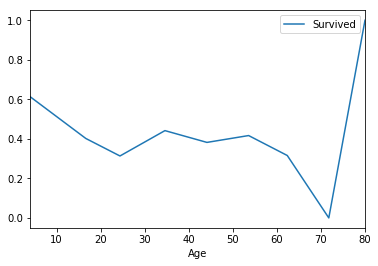

In [21]:
grouped_ages = df[['Age','Survived']].groupby(by=lambda index: int(df.loc[index]['Age']/10)).mean()
grouped_ages.plot(x='Age', y='Survived')

In [22]:
#Why the line goes up in 80 years? An outlier?
df[df['Age']>=80]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Cabin_letter,surname,lang
PassengerId,,,,,,,,,,,,,,
631,80.0,A23,S,30.0,"Barkworth, Mr. Algernon Henry Wilson",0,1,male,0,1.0,27042,A,Barkworth,en


Except for one case, the older the person the less probability of survival. So it's obvious this feature will be helpful for our ML model.

We could use this feature directly, or group by decades; as we don't know which one could be better, let's give both to the ML model.

In [23]:
df['decade'] = df['Age'].apply(lambda age: int(age/10))

# We will save useful features (column names) for later.
useful = ['Age', 'decade']

### 4.1.2 Fare

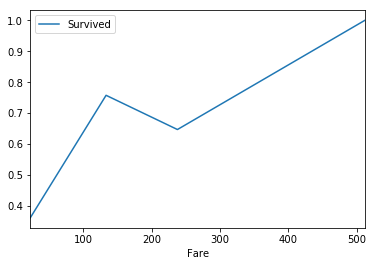

In [24]:
# Grouping by 100s
fare_grouped = df[['Fare', 'Survived']].groupby(by=lambda i: int(df.loc[i]['Fare']/100)).mean()
fare_grouped.plot(x='Fare', y='Survived')

It is clear that cheaper tickets will have less chance of survival. We can use this as input too.

In [25]:
useful.append('Fare')

### 4.1.3 SibSp (Sibblings + Spouses) and Parch (Parents + children)

Will having family of the similar age (sibblings + spouse) help? Let's find out!

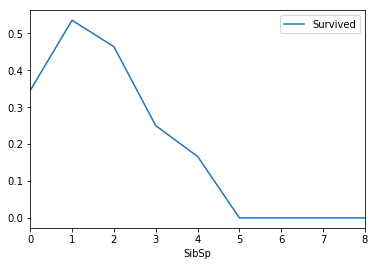

In [26]:
sibblings_grouped = df[['SibSp', 'Survived']].groupby('SibSp').mean()
sibblings_grouped.plot()

Being alone or having a big family seems a problem. Let's see the case with parents and children value.

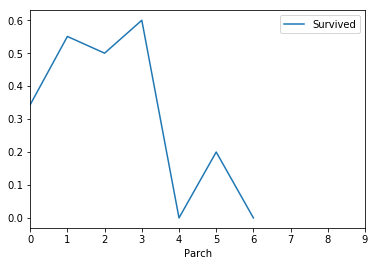

In [27]:
generations_grouped = df[['Parch', 'Survived']].groupby('Parch').mean()
generations_grouped.plot()

In this case, again being alone or being in a big family is a problem for your survival, but the correlation is not that clear.

We could reframe this information with new features: being alone and the size of the family.

In [28]:
df['family_size'] = df['SibSp'] + df['Parch'] + 1
df['alone'] = df['family_size'].apply(lambda s: 1 if s==1 else 0)

useful.extend(['SibSp', 'family_size', 'alone'])

## 4.2 Categorical features

### 4.2.1 Sex

Let's see which sex has more chances of surviving.

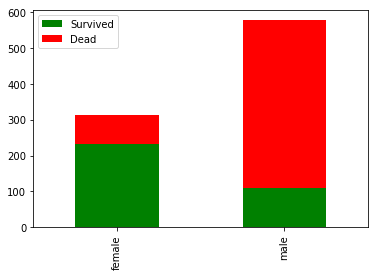

In [29]:
survived_sex = df[df['Survived']==1]['Sex'].value_counts()
survived_sex.name='Survived'
dead_sex = df[df['Survived']==0]['Sex'].value_counts()
dead_sex.name='Dead'

table = pd.DataFrame([survived_sex,dead_sex])

table.T.plot(kind='bar', stacked=True, color='gr')

It is clear that most females survived, while most men died. Let's encode it as values.

In [30]:
df['male'] = df['Sex'].map({'male': 1, 'female': 0})

useful.append('male')

### 4.2.2 Embarked

As we have seen while completing the missing values of this feature, there is some relation with the survival chances.

Let's see it again, but splitting by Pclass.

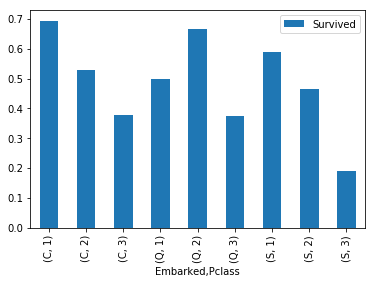

In [31]:
embarked_grouped = df[['Embarked', 'Pclass', 'Survived']].groupby(['Embarked','Pclass']).mean()
embarked_grouped.plot(kind='bar', stacked=True)

In [32]:
df = pd.concat([df, pd.get_dummies(df['Embarked'], prefix='embarked')], axis=1)

useful.extend(['embarked_{}'.format(x) for x in ['C', 'S', 'Q']])

It's clear than there is differences and we need to encode this feature in multiple columns (one-hot encoding), that can be done with pandas get_dummies().

In [33]:
df = pd.concat([df, pd.get_dummies(df['Embarked'], prefix='embarked')], axis=1)

useful.extend(['embarked_{}'.format(x) for x in ['C', 'S', 'Q']])

### 4.2.3 Pclass

We have seen several times by now that there is a direct correlation between the class and the chance of survival. As this feature is already a number, we do not need to apply any process.

In [34]:
useful.append('Pclass')

# 5. Feature engineering

While doing feature completion we have already done some feature engineering that need further process: Cabin_letter (deck), surname, language. We have also created some new features that are already useful: decade, alone and family_size. Let's try out more ideas!

## 5.1 Cabin_letter

We just need to encode it in multiple columns.

In [35]:
df = pd.concat([df, pd.get_dummies(df['Cabin_letter'], prefix='deck')], axis=1)

letters = df['Cabin_letter'].unique()
useful.extend(['deck_{}'.format(x) for x in letters])

## 5.2 name and title

## 5.3 language

When the evacuation started perhaps they used only English to alert the passengers. Will the language have relation with the surviving ratio? Let's group languages and find it out.

In [45]:
# af=Afrikaans, cs=Czech, cy=Welsh, da=Danish, de=German, en=English, eo=Esperanto, es=Spanish, et=Estonian,
# eu=Basque, fi=Finnish, fr=France, id=Indonesian, it=Italy, la=Latin, lt=Lithuanian, lv=Latvian, mt=Maltese,
# nl=Dutch, nn=Norwegian N., no=Norwegian, pl=Polish, pt=Portuguese, ro=Romanian, rw=Rwanda, sk=Slovak,
# sl=Slovenian, sv=Swedish, tl=Tagalog, tr=Turkish, xh=Xhosa (South Africa), zh=Chinese.

language_groups = {
    'uk': ('cy', 'en'),
    'latin': ('es', 'fr', 'it', 'la', 'pt', 'ro'),
    'germanic': ('da', 'nl'),
    'north': ('fi', 'nn', 'no', 'sv'),
    'east_europe': ('cs', 'pl','sk','sl'),
    'african': ('af', 'rw', 'xh'),
    'russian': ('et', 'lt', 'lv'),
    'asian': ('id', 'tl', 'tr')
}
language_map = { y:x for x in language_groups for y in language_groups[x]}    

df['lang_group'] = df['lang'].apply(lambda l: language_map[l] if l in language_map else 'other')
df[['lang_group','lang','Survived','Name']].groupby(['lang_group','lang']).count()

Survived  Name
lang_group  lang                
african     af           0     1
            rw           1     1
            xh           0     4
asian       id           4     6
            tl           1     2
            tr           3     3
east_europe cs           1     1
            pl          16    30
            sk           4     5
            sl           1     5
germanic    da          16    26
            nl          12    15
latin       es          15    25
            fr          22    32
            it          22    33
            la           1     1
            pt           4     6
            ro           1     1
north       fi          17    20
            nn           1     1
            no           2     3
            sv          15    22
other       de          93   138
            eo           2     4
            eu           1     3
            mt           5     6
            zh           1     1
russian     et          22    30
            lt           4     4
            lv           2     2
uk          cy           1     2
            en         601   876

## 5.4 Head of family

We wonder if the head of family lives, the rest of the family also lives. In a family, the man will try to save his wife and children *before* himself. So maybe this information can help us.

In [71]:
fields = ['Name','Survived','SibSp','Parch','Ticket','male', 'family_size']
tickets_grouped = df[fields].groupby(['Ticket','PassengerId']).mean()
tickets_grouped[(tickets_grouped['family_size']>1]

Survived  SibSp  Parch  male  family_size
Ticket             PassengerId                                           
110413             263               0.0      1      1     1            3
                   559               1.0      1      1     0            3
                   586               1.0      0      2     0            3
110813             367               1.0      1      0     0            2
                   1128              NaN      1      0     1            2
111361             330               1.0      0      1     0            2
                   524               1.0      0      1     0            2
112378             1260              NaN      0      1     0            2
                   1294              NaN      0      1     0            2
112901             1197              NaN      1      1     0            3
113503             378               0.0      0      2     1            3
                   1110              NaN      1      1     0            3
                   1299              NaN      1      1     1            3
113505             167               1.0      0      1     0            2
                   357               1.0      0      1     0            2
113509             55                0.0      0      1     1            2
                   918               NaN      0      1     0            2
113760             391               1.0      1      2     1            4
                   436               1.0      1      2     0            4
                   764               1.0      1      2     0            4
                   803               1.0      1      2     1            4
113773             749               0.0      1      0     1            2
                   1074              NaN      1      0     0            2
113776             152               1.0      1      0     0            2
                   337               0.0      1      0     1            2
113781             298               0.0      1      2     0            4
                   306               1.0      1      2     1            4
                   499               0.0      1      2     0            4
                   1198              NaN      1      2     1            4
113789             36                0.0      1      0     1            2
...                                  ...    ...    ...   ...          ...
SC/AH 3085         922               NaN      1      0     1            2
SC/PARIS 2148      1112              NaN      1      0     0            2
SC/PARIS 2149      867               1.0      1      0     0            2
SC/PARIS 2167      362               0.0      1      0     1            2
                   907               NaN      1      0     0            2
SC/Paris 2123      44                1.0      1      2     0            4
                   609               1.0      1      2     0            4
                   686               0.0      1      2     1            4
                   1188              NaN      1      2     0            4
SOTON/O.Q. 3101315 1051              NaN      0      2     0            3
                   1173              NaN      1      1     1            3
                   1301              NaN      1      1     0            3
STON/O 2. 3101285  665               1.0      1      0     1            2
STON/O2. 3101270   910               NaN      1      0     0            2
STON/O2. 3101271   730               0.0      1      0     0            2
STON/O2. 3101279   143               1.0      1      0     0            2
                   404               0.0      1      0     1            2
W./C. 6607         784               0.0      1      2     1            4
                   889               0.0      1      2     0            4
                   925               NaN      1      2     0            4
                   1136              NaN      1      2     1            4
W./C. 6608         87               

In [59]:
df.reindex?

In [ ]:
df[['Name','Survived','SibSp','Parch','Ticket']].reindex